## Graph API

In [1]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import  StateGraph, START, END
from langgraph.graph.message import add_messages ## work add the msg appeneded to the state

In [2]:
## state
class State(TypedDict):
    # Msg have type list defines how this state key should be updated

    messages : Annotated[list, add_messages] ## appended to the list

graph_bilder =StateGraph(State)

graph_bilder

In [3]:
## Building the graph

import os
from dotenv import load_dotenv
load_dotenv()


True

In [16]:
from langchain_groq import  ChatGroq
from langchain.chat_models import init_chat_model

llm =ChatGroq(model="openai/gpt-oss-20b")

In [17]:
llm 

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000019D475D7250>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000019D475D6710>, model_name='openai/gpt-oss-20b', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [18]:
## node Chatbot

def chatbot(state:State):
    return {"messages": [llm.invoke(state['messages'])]}

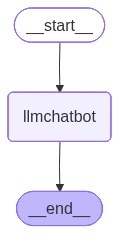

In [19]:
graph_builder = StateGraph(State)

#adding node

graph_builder.add_node("llmchatbot", chatbot)

#adding edge -- adding the node names
graph_builder.add_edge(START, "llmchatbot") 
graph_builder.add_edge("llmchatbot", END)


## compile graph 

graph = graph_builder.compile()


## visualize

from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass



In [25]:
## Run the LLM 
response = graph.invoke({"messages":"Hi how are you?"})
response["messages"][-1].content

'Hi there! I’m doing great—thanks for asking. How about you? Anything interesting happening today?'

In [31]:
for event in graph.stream({"messages": "Hi How are you?"}):
    for value in event.values():
        print(value["messages"][-1].content)

Hi! I’m doing great—thanks for asking. How can I help you today?
